<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [2]:
import pandas as pd
df = pd.read_csv('/content/exportgbiall01_05_2.csv', sep = ";")
df

,Timestamp,User,Case id,Log,Activity,Number of dialog steps
0,2025.03.11 09:57:20,GBIALL-001,1,FB50,Enter G/L Account Document,201
1,2025.03.11 09:58:07,GBIALL-001,1,FB50,Enter G/L Account Document,201
2,2025.03.11 10:01:20,GBIALL-001,1,FB50,Enter G/L Account Document,201
3,2025.03.11 10:02:38,GBIALL-001,1,FB50,Enter G/L Account Document,201
4,2025.03.11 10:03:05,GBIALL-001,1,FB50,Enter G/L Account Document,201
...,...,...,...,...,...,...
127,2025.03.11 11:11:59,GBIALL-005,5,FB65,Enter Incoming Credit Memos,44
128,2025.03.11 11:12:27,GBIALL-005,5,FBL1H,Vendor Line Item Browser,49
129,2025.03.11 11:12:50,GBIALL-005,5,FBL1N,Vendor Line Items,47
130,2025.03.11 11:14:06,GBIALL-005,5,F-53,Post Outgoing Payments,184


In [3]:
pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=51cecaa15e15e02cd6e4bcc4371283f10ca9951ff93a5cd3f7ba9fda8bc1e8b6
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [4]:
import pm4py
log = pm4py.format_dataframe(df, case_id='Case id',activity_key='Activity',
                             timestamp_key='Timestamp')
log["time:timestamp"] = pd.to_datetime(df.Timestamp)

In [5]:
pm4py.get_start_activities(log)

{'Enter G/L Account Document': 1,
 'Change Document': 1,
 'Client Administration': 1}

In [6]:
pm4py.get_end_activities(log)

{'Vendor Line Items': 1,
 'Enter G/L Account Document': 1,
 'Post Outgoing Payments': 1}

In [8]:
pm4py.filter_start_activities(log, {'Change Document'})

,Timestamp,User,Case id,Log,Activity,Number of dialog steps,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
52,2025.03.11 10:02:27,GBIALL-002,2,FB02,Change Document,3,2,Change Document,2025-03-11 10:02:27,52,1
53,2025.03.11 10:04:38,GBIALL-002,2,FAGLB03,Display Balances,70,2,Display Balances,2025-03-11 10:04:38,53,1
54,2025.03.11 10:07:22,GBIALL-002,2,FB50,Enter G/L Account Document,251,2,Enter G/L Account Document,2025-03-11 10:07:22,54,1
55,2025.03.11 10:08:52,GBIALL-002,2,FB50,Enter G/L Account Document,251,2,Enter G/L Account Document,2025-03-11 10:08:52,55,1
56,2025.03.11 10:09:20,GBIALL-002,2,FB50,Enter G/L Account Document,251,2,Enter G/L Account Document,2025-03-11 10:09:20,56,1
57,2025.03.11 10:11:14,GBIALL-002,2,FB50,Enter G/L Account Document,251,2,Enter G/L Account Document,2025-03-11 10:11:14,57,1
58,2025.03.11 10:14:40,GBIALL-002,2,FB50,Enter G/L Account Document,251,2,Enter G/L Account Document,2025-03-11 10:14:40,58,1
59,2025.03.11 10:15:14,GBIALL-002,2,FAGLB03,Display Balances,70,2,Display Balances,2025-03-11 10:15:14,59,1
60,2025.03.11 10:15:32,GBIALL-002,2,FB03,Display Document,1,2,Display Document,2025-03-11 10:15:32,60,1
61,2025.03.11 10:15:39,GBIALL-002,2,FB03L,Document Display : G/L View,1,2,Document Display : G/L View,2025-03-11 10:15:39,61,1


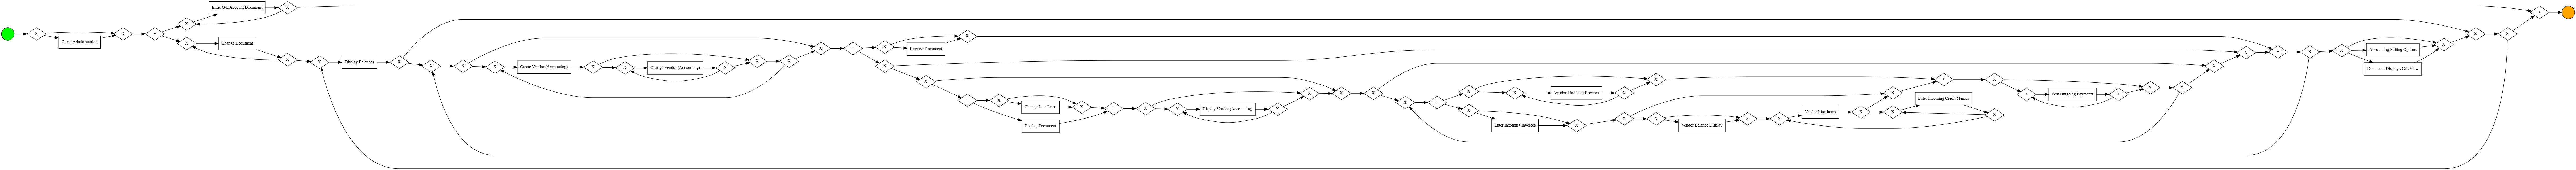

In [9]:
bpmn_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(bpmn_model)

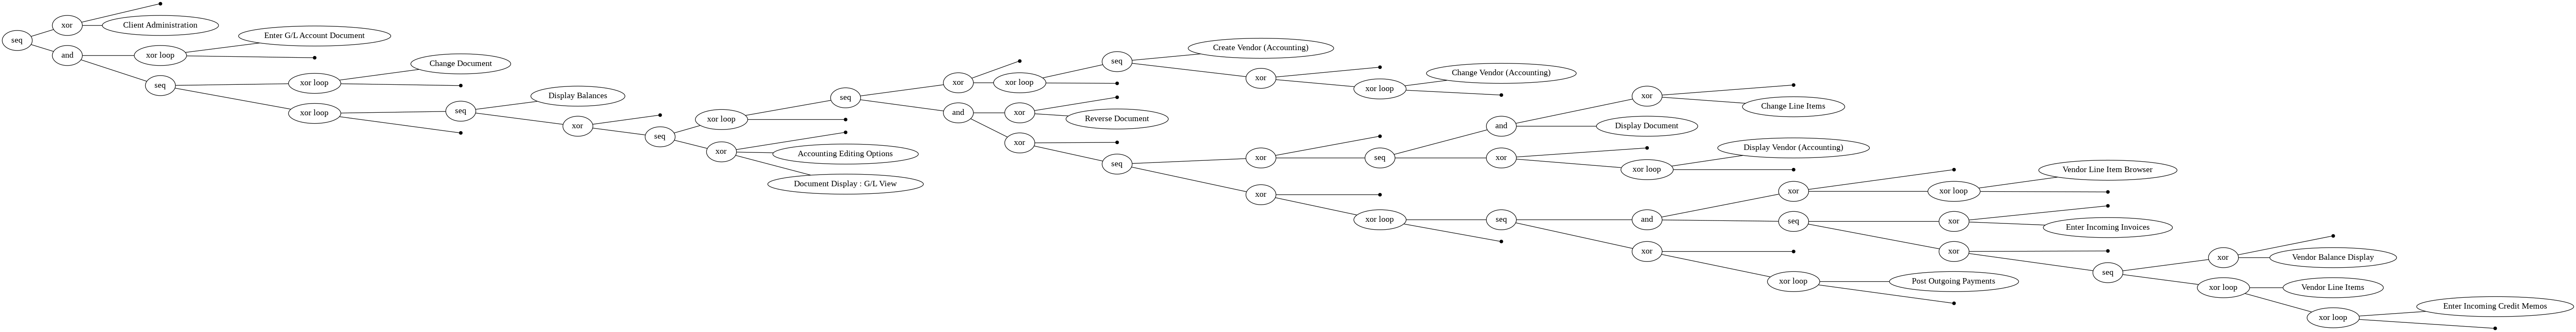

In [10]:
process_tree = pm4py.discover_process_tree_inductive(log)
pm4py.view_process_tree(process_tree)

In [14]:
map = pm4py.discover_heuristics_net(log)
filtered_map = pm4py.filter_activity_done_different_resources(log, activity = 'Enter G/L Account Document',  resource_key=)
pm4py.view_heuristics_net(filtered_map)

TypeError: filter_activity_done_different_resources() got an unexpected keyword argument 'resource'

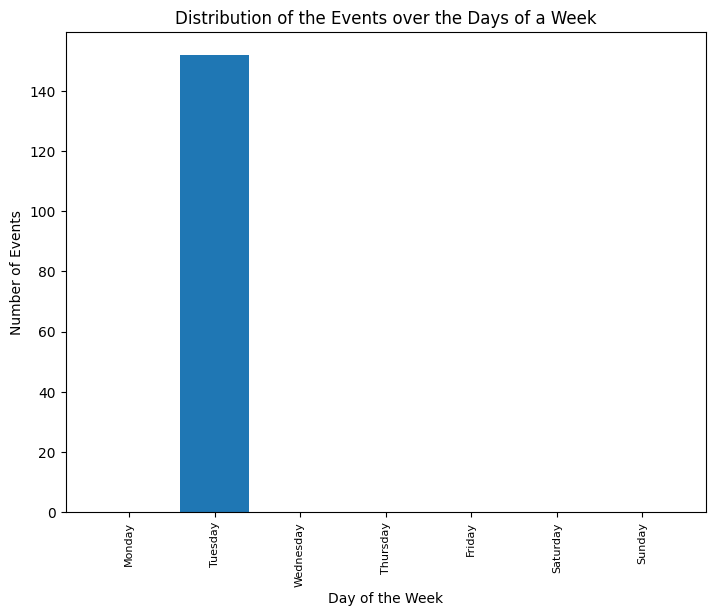

In [ ]:
pm4py.view_events_distribution_graph(log, distr_type="days_week")

# Új szakasz

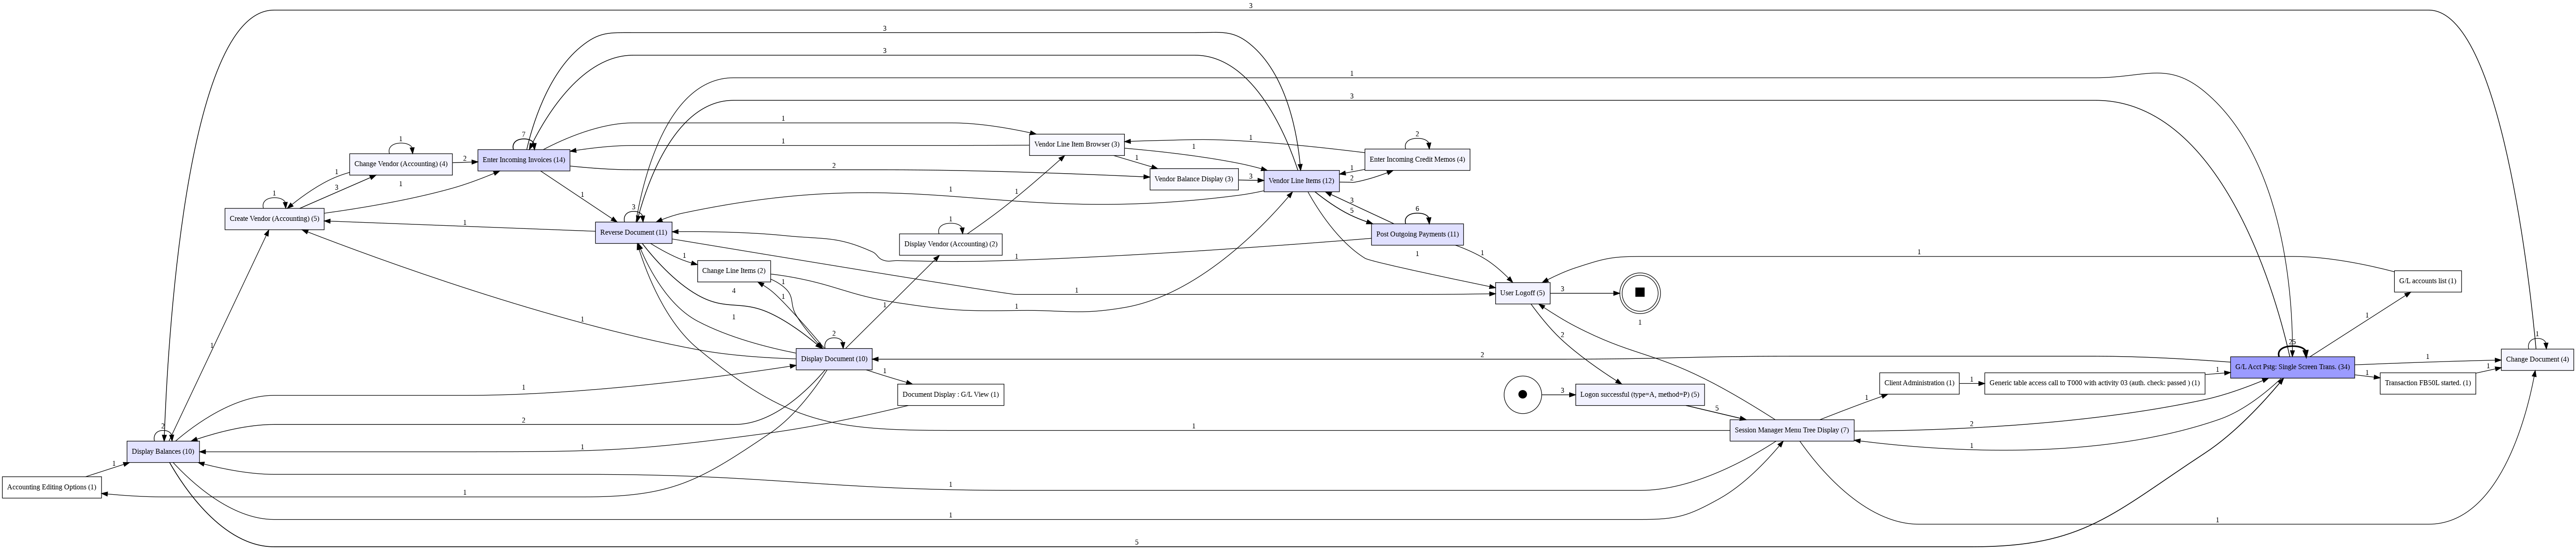

In [ ]:


dfg = pm4py.discover_dfg(log)


pm4py.view_dfg(dfg[0], dfg[1], dfg[2])

